In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
str(x)

'[ -4.65782460e-02   4.83819830e+00   8.53878659e+00   1.13422626e+01\n   1.34661080e+01   1.50750818e+01   1.62940014e+01   1.72174253e+01\n   1.79169889e+01   1.84469613e+01   1.88484555e+01   1.91526178e+01\n   1.93830438e+01   1.95576089e+01   1.96898552e+01   1.97900419e+01\n   1.98659408e+01   1.99234400e+01   1.99670000e+01   2.00000000e+01\n   2.00250000e+01   2.00500000e+01   2.00750000e+01   2.01000000e+01\n   2.01250000e+01   2.01500000e+01   2.01750000e+01   2.02000000e+01\n   2.02250000e+01   2.02500000e+01   2.02750000e+01   2.03000000e+01\n   2.03250000e+01   2.03500000e+01   2.03750000e+01   2.04000000e+01\n   2.04250000e+01   2.04500000e+01   2.04750000e+01   2.05000000e+01\n   2.05250000e+01   2.05500000e+01   2.05750000e+01   2.06000000e+01\n   2.06250000e+01   2.06500000e+01   2.06750000e+01   2.07000000e+01\n   2.07250000e+01   2.07500000e+01   2.07750000e+01   2.08000000e+01\n   2.08250000e+01   2.08500000e+01   2.08750000e+01   2.09000000e+01\n   2.09250000e+01  

In [28]:
def line_to_arr(line):
    return np.array(line.strip().split(),dtype=float) 

def read_grid(filename):
    with open(filename) as f:
        f.readline()
        x = line_to_arr(f.readline())
        y = line_to_arr(f.readline())
    return x, y

def write_grid(filename, x, y):
    def mk_line(sep, arr):
        return sep.join(['%s'%a for a in arr])
    nx = str(len(x))
    ny = str(len(y))
    sep = '   '
    lines = []
    lines.append(sep.join([nx, ny]))
    lines.append(mk_line(sep, x))
    lines.append(mk_line(sep, y))
    with open(filename, 'w') as f:
        f.write('\n'.join(lines))

In [30]:
def double_grid(x, y):
    nx = len(x)
    ny = len(y)
    x2 = np.zeros(2*nx-1)
    y2 = np.zeros(2*ny-1)
    x2[::2] = x
    y2[::2] = y
    x2[1::2] = 0.5*(x[:-1] + x[1:])
    y2[1::2] = 0.5*(y[:-1] + y[1:])
    return x2, y2

In [29]:
x, y = read_grid('grid_coarse')

In [31]:
xmed, ymed = double_grid(x, y)
write_grid('grid_medium', xmed, ymed)

In [32]:
xf, yf = double_grid(xmed, ymed)
write_grid('grid_fine', xf, yf)

(20.5, 20.6)

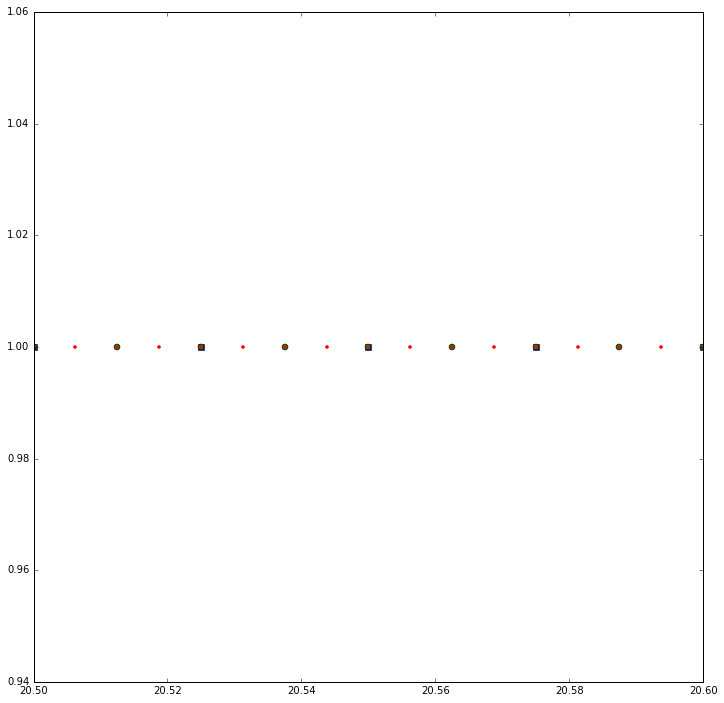

In [38]:
plt.figure(figsize=(12, 12))
plt.plot(x, np.ones_like(x), 's')
plt.plot(xmed, np.ones_like(x2), 'o')
plt.plot(xf, np.ones_like(xf), '.')
plt.xlim(20.5, 20.6)